In [24]:
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import seaborn as sns

plt. rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/Wholesale%20customers%20data.csv')

In [26]:
# df.info()
# df.describe()
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [27]:
from sklearn.preprocessing import normalize

scaled_data = normalize(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


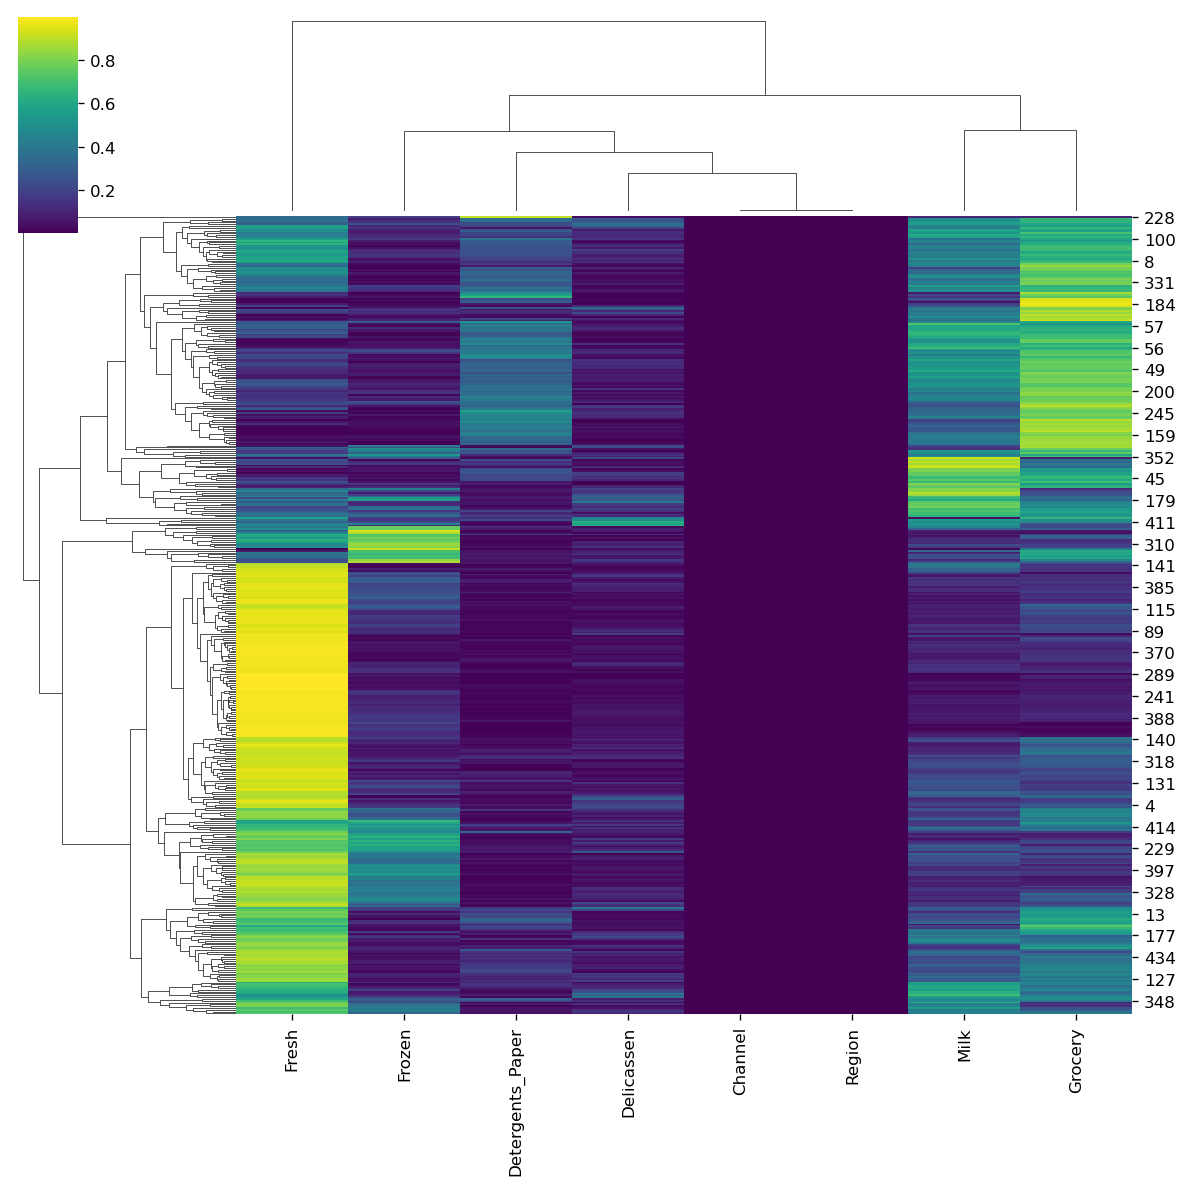

In [28]:
sns.clustermap(scaled_df, cmap='viridis')

<AxesSubplot:>

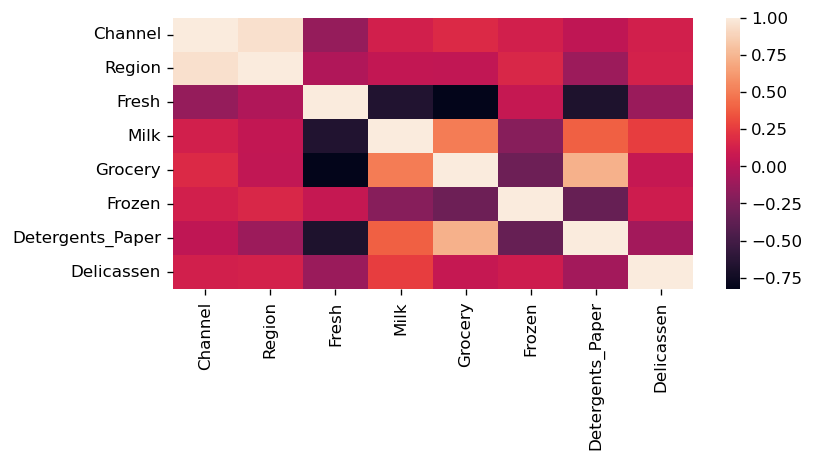

In [29]:
sns.heatmap(scaled_df.corr())

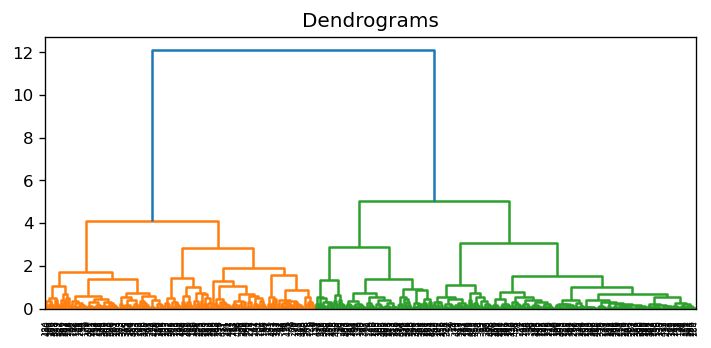

In [45]:
import scipy.cluster.hierarchy as shc

plt.title("Dendrograms")
dendro = shc.dendrogram(shc.linkage(scaled_df, method='ward'))

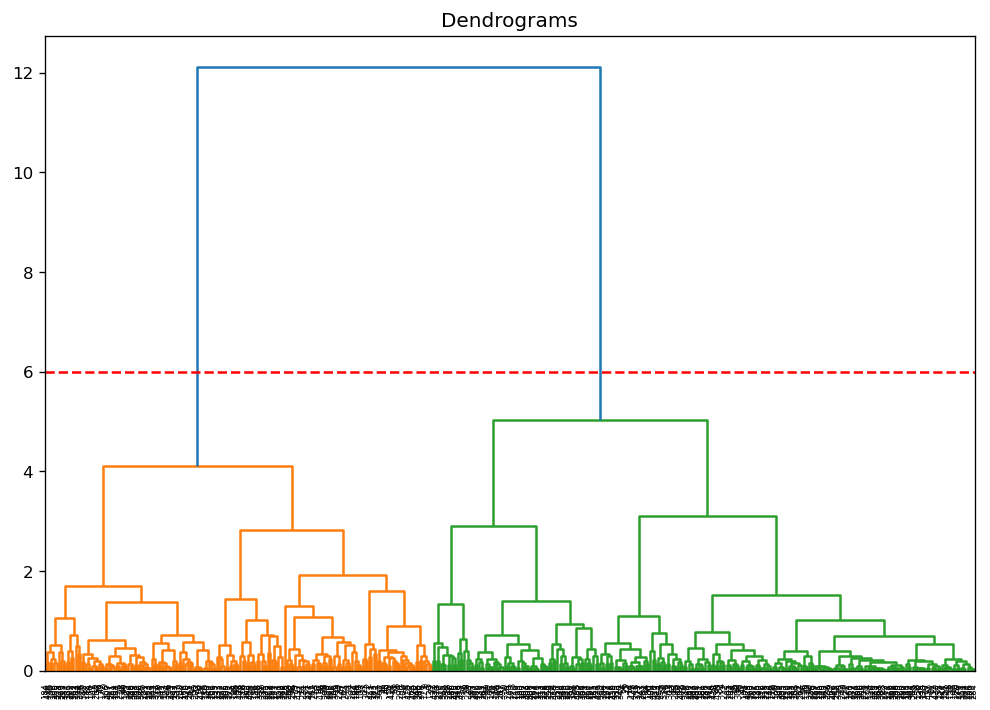

In [46]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(scaled_df, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [34]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_labels = model.fit_predict(scaled_data)

In [36]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


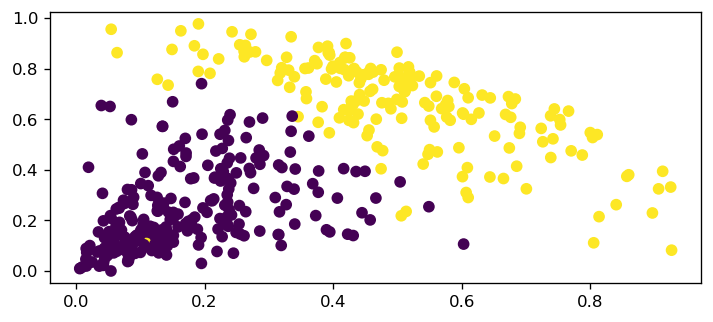

In [49]:
plt.scatter(scaled_df['Milk'], scaled_df['Grocery'], c=cluster_labels)

In [61]:
# try none n_cluster
new_model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [62]:
cluster_labels = new_model.fit_predict(scaled_df)
cluster_labels

array([226, 297, 439, 350, 284, 316, 314, 419, 262, 396, 387, 280, 377,
       319, 299, 318, 344, 251, 321, 247, 273, 302, 264, 339, 234, 421,
       336, 367, 236, 434, 257, 283, 409, 417, 333, 424, 323, 435, 322,
       433, 437, 235, 287, 381, 117, 293, 291, 328, 277, 317, 223, 249,
       395, 228, 412, 364, 375, 431, 390, 325, 353, 300, 385, 330, 324,
       378, 263, 337, 331, 354, 348, 271, 160, 242, 274, 326, 275, 345,
       386, 224, 383, 392, 427, 219, 420, 227, 313, 369, 260, 379, 418,
       365, 281, 309, 399, 216, 366, 346, 276, 332, 285, 307, 240, 255,
       361, 363, 373, 290, 429, 436, 380, 266, 310, 384, 217, 428, 394,
       308, 349, 401, 209, 241, 189, 329, 432, 164, 430, 156, 315, 426,
       359, 282, 192, 214, 215, 137, 357, 107, 269, 292, 335, 414, 334,
       398, 248, 289, 191, 261, 244, 165, 438, 423, 144, 382, 376, 113,
       253, 400, 161, 270, 245, 237, 259, 407, 158, 352, 356, 208, 402,
       294, 154, 301, 405, 298, 327, 182, 190, 252, 415, 389, 14

In [63]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

linkage_matrix = hierarchy.linkage(new_model.children_)
linkage_matrix

array([[ 25.        , 106.        ,   1.41421356,   2.        ],
       [420.        , 426.        ,   1.41421356,   2.        ],
       [432.        , 435.        ,   1.41421356,   2.        ],
       ...,
       [485.        , 873.        ,  61.29437168, 437.        ],
       [332.        , 874.        ,  61.40032573, 438.        ],
       [424.        , 875.        ,  72.9451849 , 439.        ]])

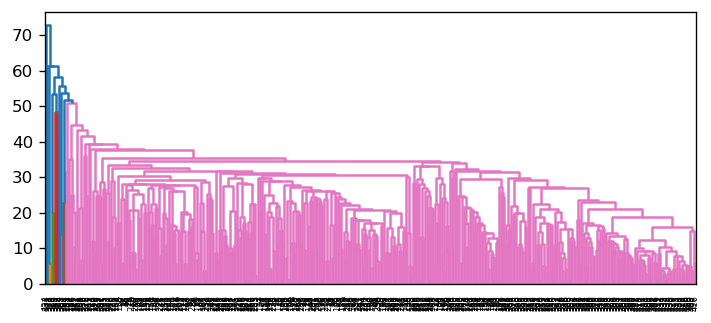

In [65]:
dendro = dendrogram(linkage_matrix)

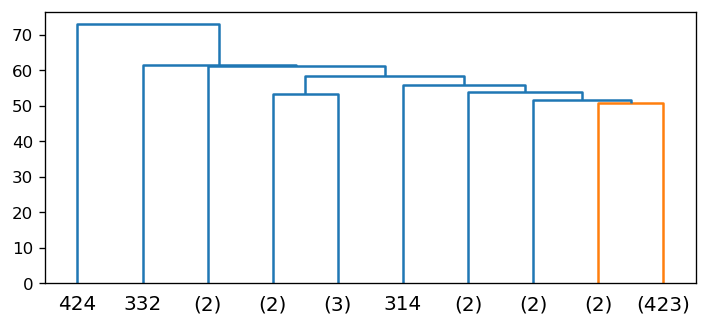

In [67]:
dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p=10)

## Probabilistic Clustering

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/Clustering_gmm.csv')

In [51]:
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


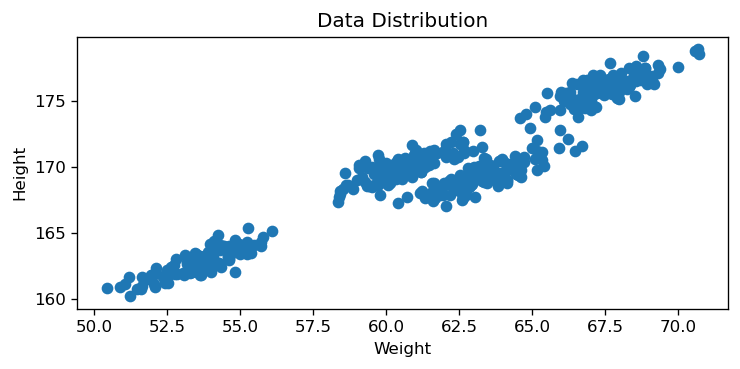

In [52]:
plt.scatter(df["Weight"], df["Height"])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()

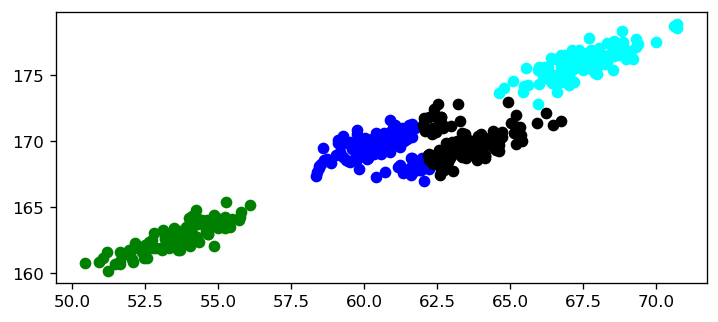

In [53]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

#predictions from kmeans
pred = kmeans.predict(df)
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.columns = ['Weight', 'Height', 'cluster']

#plotting results
color=['blue','green','cyan', 'black']
for k in range(0,4):
    df = frame[frame["cluster"]==k]
    plt.scatter(df["Weight"], df["Height"], c=color[k])
plt.show()

### Gaussian Mixture Model

In [58]:
data = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/Clustering_gmm.csv')

In [59]:
data.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


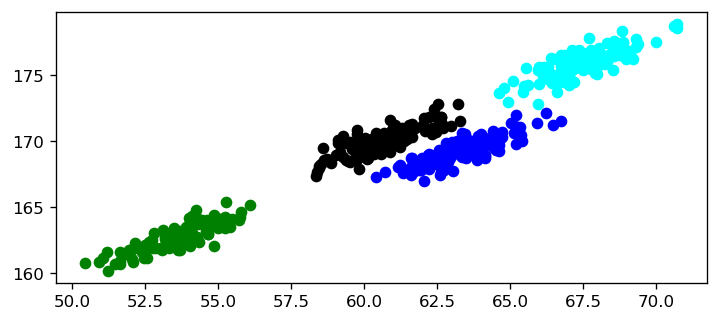

In [60]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"], data["Height"], c=color[k])
plt.show()